In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Train Model

In [3]:
# Get train set
df = pd.read_csv('../data/train_dataset.csv')
df

,id,title,genre
0,1,Sự cố VNDirect: Hacker tấn công lỗ hổng 'zero ...,kinh-te
1,2,"Vượt thu hoạt động xuất nhập khẩu, Hải Phòng đ...",kinh-te
2,3,Phát triển kinh tế nhưng Đắk Nông phải giữ rừn...,kinh-te
3,4,Chủ tịch UBND tỉnh Đắk Nông có số phiếu tín nh...,kinh-te
4,5,Ngân hàng nào sắp chia cổ tức cho nhà đầu tư?,kinh-te
...,...,...,...
995,996,Thiệt hại kinh tế khi Facebook 'sập mạng',cong-nghe-game
996,997,Chuyển đổi số là 'chất xúc tác' cho hoạt động ...,cong-nghe-game
997,998,"Trình giả lập Yuzu ngừng hoạt động, phải bồi t...",cong-nghe-game
998,999,Những lưu ý khi mạng xã hội bị treo và không t...,cong-nghe-game


In [4]:
import re

stopwords_vi = set([
    "và", "của", "các", "là", "cho", "trong", "với", "cũng",
])

# preprocessing
def preprocess_text_vi(text, stopwords = stopwords_vi):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['title'] = df['title'].apply(lambda x: preprocess_text_vi(x))

In [5]:
df = df.drop(['id'], axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df

,title,genre
0,70555 chủ rừng hưởng lợi từ bán tín chỉ carbon,kinh-te
1,kiến nghị đầu tư 2 tuyến cao tốc nối nhau dọc ...,kinh-te
2,doanh nghiệp vi phạm công bố thông tin không đ...,kinh-te
3,chi phí tăng gấp 3 nếu cấm xe tải 3 đường cửa ...,kinh-te
4,nhiều cổ phiếu tăng trần liên tục doanh nghiệp...,kinh-te
...,...,...
995,tư vấn sức khỏe mổ cận nên hay không,suc-khoe
996,tính năng ai tràn ngập smartphone có gây lo ngại,cong-nghe-game
997,gần 80 triệu usd hỗ trợ quảng nam quảng trị th...,kinh-te
998,4 phó giám đốc sở vào hội đồng trường trường đ...,giao-duc


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [7]:
# Initialize X, y
X_train = df['title']
df.insert(2, 'encoded', le.fit_transform(df['genre']), True)
y_train = df['encoded']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF extraction
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Train model
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

### Evaluate model

In [10]:
# Get test set
ts = pd.read_csv('../data/test_dataset.csv')
ts

,id,title,genre
0,1,Thủ tướng quy định trường hợp EVN được điều ch...,kinh-te
1,2,Tập đoàn logistic thứ ba thế giới mong Thái Bì...,kinh-te
2,3,Các thương hiệu nổi tiếng trong hệ thống Tập đ...,kinh-te
3,4,Giá vàng hôm nay 26.3.2024: Quay lại mức giá 8...,kinh-te
4,5,"Giá USD hôm nay 26.3.2024: Ngân hàng giảm, thị...",kinh-te
...,...,...,...
245,246,Qualcomm đưa 'AI trên thiết bị' đến smartphone...,cong-nghe-game
246,247,Game 'khủng' Marvel 1943: Rise of Hydra sẽ ra ...,cong-nghe-game
247,248,Nhiều PC sắp 'lỗi thời' dù có RAM 16 GB,cong-nghe-game
248,249,"Xuất hiện hệ điều hành game 'mới toanh', cạnh ...",cong-nghe-game


In [11]:
ts['title'] = ts['title'].apply(lambda x: preprocess_text_vi(x))

In [12]:
ts = ts.drop(['id'], axis=1)
ts = ts.sample(frac=1).reset_index(drop=True)
ts

,title,genre
0,ecovacs đưa dàn robot hút bụi tại ces 2024 về ...,cong-nghe-game
1,hệ thống presto apple sắp triển khai iphone có...,cong-nghe-game
2,tuyển sinh lớp 1 trực tuyến khó khăn khi đăng ...,giao-duc
3,3 mẫu xe xanh chờ thời cơ tung ra thị trường v...,xe
4,loạt dự án nhà phố hâm nóng thị trường bình dương,kinh-te
...,...,...
245,khởi công cảng mỹ thủy hơn 14000 tỉ đồng,kinh-te
246,nhập viện cấp cứu vì dương vật giả nằm hậu môn,suc-khoe
247,ngày mới tin tức sức khỏe bệnh gì cần lưu ý kh...,suc-khoe
248,nổ bình gas người phụ nữ bị gãy xương khớp vai,suc-khoe


In [13]:
X_test = ts['title']
ts.insert(2, 'encoded', le.transform(ts['genre']), True)
y_test = ts['encoded']

In [14]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)
pred = nb.predict(X_test_tfidf)

In [15]:
# Accuracy
from sklearn import metrics

print("Multinomial Naive Bayes: (TFIDF approach) \n")

accuracy = metrics.accuracy_score(y_test,pred)

print("Accuracy: " + str("{:.2f}".format(accuracy*100)), "%")

Multinomial Naive Bayes: (TFIDF approach) 

Accuracy: 84.40 %


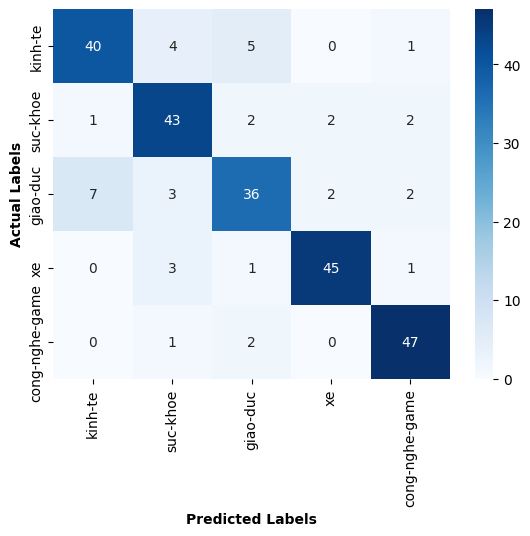

In [16]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pred)

labels = df['genre'].unique()

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels', fontweight='bold')
plt.ylabel('Actual Labels', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### Training

In [17]:
# Laplace smoothing (Tuning parameter - Alpha)
alphas = np.arange(0.1, 1.1, 0.1)

def train_and_predict(alpha):
  nb = MultinomialNB(alpha=alpha)
  nb.fit(X_train_tfidf, y_train)
  pred = nb.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  return accuracy, precision, recall, f1
  return accuracy, report

for alpha in alphas:
  print("Alpha: ", "{:.1f}".format(alpha))
  accuracy, precision, recall, f1 = train_and_predict(alpha)
  print("Accuracy: ", "{:.4%}".format(accuracy))
  print("Precision: ", "{:.4%}".format(precision))
  print("Recall: ", "{:.4%}".format(recall))
  print("F1-Score: ", "{:.4%}".format(f1))
  print()

Alpha:  0.1
Accuracy:  86.4000%
Precision:  86.6948%
Recall:  86.4000%
F1-Score:  86.4698%

Alpha:  0.2
Accuracy:  86.8000%
Precision:  87.0693%
Recall:  86.8000%
F1-Score:  86.8640%

Alpha:  0.3
Accuracy:  84.8000%
Precision:  84.8726%
Recall:  84.8000%
F1-Score:  84.8098%

Alpha:  0.4
Accuracy:  84.4000%
Precision:  84.5143%
Recall:  84.4000%
F1-Score:  84.4202%

Alpha:  0.5
Accuracy:  85.2000%
Precision:  85.2464%
Recall:  85.2000%
F1-Score:  85.2056%

Alpha:  0.6
Accuracy:  85.6000%
Precision:  85.6990%
Recall:  85.6000%
F1-Score:  85.5912%

Alpha:  0.7
Accuracy:  84.8000%
Precision:  84.7750%
Recall:  84.8000%
F1-Score:  84.7638%

Alpha:  0.8
Accuracy:  84.8000%
Precision:  84.7750%
Recall:  84.8000%
F1-Score:  84.7638%

Alpha:  0.9
Accuracy:  84.4000%
Precision:  84.3480%
Recall:  84.4000%
F1-Score:  84.2992%

Alpha:  1.0
Accuracy:  84.4000%
Precision:  84.3480%
Recall:  84.4000%
F1-Score:  84.2992%



In [18]:
# K-fold cross-validation
for n_splits in range(2, 16):
    nb = MultinomialNB()
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    nb_acc = []

    for train_index, val_index in skf.split(X_train_tfidf, y_train):
        x_t, x_v = X_train_tfidf[train_index], X_train_tfidf[val_index]
        y_t, y_v = y_train.iloc[train_index], y_train.iloc[val_index]
        nb.fit(x_t, y_t)
        nb_acc.append(nb.score(x_v, y_v))

    print(f"Accuracy với {n_splits} splits: {'{:.2%}'.format(np.mean(nb_acc))}", "\n")

Accuracy với 2 splits: 79.70% 

Accuracy với 3 splits: 82.20% 

Accuracy với 4 splits: 83.00% 

Accuracy với 5 splits: 82.40% 

Accuracy với 6 splits: 82.71% 

Accuracy với 7 splits: 83.80% 

Accuracy với 8 splits: 83.40% 

Accuracy với 9 splits: 83.60% 

Accuracy với 10 splits: 83.30% 

Accuracy với 11 splits: 83.50% 

Accuracy với 12 splits: 83.80% 

Accuracy với 13 splits: 83.31% 

Accuracy với 14 splits: 83.50% 

Accuracy với 15 splits: 83.60% 



In [19]:
best_accuracy = 0
best_alpha = 0
best_n_splits = 0
alphas = np.arange(0.1, 1.1 ,0.1)

for alpha in alphas:
  for n_splits in range(2, 16):
      nb = MultinomialNB(alpha=alpha)
      skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
      nb_acc = []

      for train_index, valid_index in skf.split(X_train_tfidf, y_train):
          x_t, x_v = X_train_tfidf[train_index], X_train_tfidf[valid_index]
          y_t, y_v = y_train.iloc[train_index], y_train.iloc[valid_index]
          nb.fit(x_t, y_t)
          nb_acc.append(nb.score(x_v, y_v))

      average_accuracy = np.mean(nb_acc)
      print(f"Accuracy với alpha = {alpha:.1f} và {n_splits} splits: {'{:.4%}'.format(np.mean(nb_acc))}")
      print()

      if average_accuracy > best_accuracy:
            best_accuracy = average_accuracy
            best_alpha = alpha
            best_n_splits = n_splits

print()
print(f"Accuracy cao nhất là {'{:.4%}'.format(best_accuracy)} là với alpha = {best_alpha:.1f} và {best_n_splits} splits")

Accuracy với alpha = 0.1 và 2 splits: 79.6000%

Accuracy với alpha = 0.1 và 3 splits: 83.3993%

Accuracy với alpha = 0.1 và 4 splits: 83.6000%

Accuracy với alpha = 0.1 và 5 splits: 84.4000%

Accuracy với alpha = 0.1 và 6 splits: 84.3981%

Accuracy với alpha = 0.1 và 7 splits: 83.9006%

Accuracy với alpha = 0.1 và 8 splits: 84.0000%

Accuracy với alpha = 0.1 và 9 splits: 83.5997%

Accuracy với alpha = 0.1 và 10 splits: 84.7000%

Accuracy với alpha = 0.1 và 11 splits: 84.5022%

Accuracy với alpha = 0.1 và 12 splits: 84.1939%

Accuracy với alpha = 0.1 và 13 splits: 84.5037%

Accuracy với alpha = 0.1 và 14 splits: 84.0921%

Accuracy với alpha = 0.1 và 15 splits: 85.1952%

Accuracy với alpha = 0.2 và 2 splits: 80.0000%

Accuracy với alpha = 0.2 và 3 splits: 82.7996%

Accuracy với alpha = 0.2 và 4 splits: 82.9000%

Accuracy với alpha = 0.2 và 5 splits: 83.8000%

Accuracy với alpha = 0.2 và 6 splits: 84.2995%

Accuracy với alpha = 0.2 và 7 splits: 84.0005%

Accuracy với alpha = 0.2 và 8 spli

In [20]:
nb = MultinomialNB(alpha=best_alpha)
skf = StratifiedKFold(n_splits=best_n_splits, shuffle=True, random_state=1)
nb_acc = []

for train_index, valid_index in skf.split(X_train_tfidf, y_train):
    x_t, x_v = X_train_tfidf[train_index], X_train_tfidf[valid_index]
    y_t, y_v = y_train.iloc[train_index], y_train.iloc[valid_index]
    nb.fit(x_t, y_t)
    nb_acc.append(nb.score(x_v, y_v))

average_accuracy = np.mean(nb_acc)
print(f"Accuracy trên tập train với alpha = {best_alpha} và {best_n_splits} splits: {'{:.2%}'.format(np.mean(nb_acc))}")

pred = nb.predict(X_test_tfidf)
print(f"Accuracy trên tập test: {'{:.2%}'.format(metrics.accuracy_score(y_test, pred))}")

Accuracy trên tập train với alpha = 0.1 và 15 splits: 85.20%
Accuracy trên tập test: 85.60%


In [22]:
encoded = {0:'Kinh tế', 1:'Giáo dục', 2:'Xe', 3:'Sức khỏe', 4:'Công nghệ - game'}

input_headline = [input("News Headline: ")]

headline = tfidf_vectorizer.transform(input_headline)
prediction = nb.predict(headline)

print("News Category: ", encoded[prediction[0]])

News Category:  Giáo dục
